# TITANIC DATA ANALYSIS
- The Titanic Data Set has been chosen for this Data Analysis project

#### PRIMARY QUESTION
What are the factors that influenced the survival of the passengers?
Breaking down the question to check if a combination of related parameters would influence the survival rate 
##### QUESTIONS TO AID ANALYSIS
Questions posed to analyse the Survival  and arrive at the co-relations

1.Did the individual statistics affect the Survival? 

  -Age modified to -Adult/Child(aged <14) status

  -Sex

  
2.Did travelling together with family affect the Survival?

  -SibSp
    
  -Parch

3.Did the Socio economic status affect the Survial?

  -Pclass
    
  -Fare

  -Cabin

4.Did the port of embarkation affect the Survival?

  -Embarked

5.Did the Title in the name(which is a combination of individual + class position)affect the survival

  -Mr./Miss/Master/Rev in the Name field

The below analysis will focus on answering the question and various steps of DATA ANALYSIS have been inplemented to identify the key factors 

## LOADING THE DATA

Here we are loading the entire csv file into a pandas dataframe after importing the required libraries that will be used in the analysis

In [77]:
# importing pandas,numpy for the analysis 

import pandas as pd
import numpy as np

#importing matplotlib and seaborn for the visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#using the Pandas readcsv command to load the entire dataset into a dataframe called Titanic_df

Titanic_df = pd.read_csv('C:/Users/Mash/Desktop/Udacity/DAND-Python_Numpy/titanic_data.csv')


# DATA WRANGLING
The Titanic dataset is checked for consistency of data and also the missing values are addressed.
Some changes made and new columns added


-The Age column is checked for null values and mean age of the passengers replaces the null values

-Age >14 has been considered Adult and Child otherwise and a new column is created accordingly with the classification

-The Title of the Passenger has been extracted from the Name column to check if there is any correlaton with the survival rate


In [78]:
# Replace the Age columns with null values by the mean of Age
Mean_age = np.mean(Titanic_df['Age'])
Titanic_df['Age'] = np.where(Titanic_df['Age'].isnull() == True, Mean_age,Titanic_df['Age'])

# Create a new column to classify Adult/Child
Titanic_df['Adult_Child']= np.where(Titanic_df['Age']>14,'A','C')

Titanic_df['Name']=Titanic_df['Name'].str.replace(".",',')

# Creating a function to get the titles from the series and creating a new column Title to store the same
def split_Name_for_Title(data):
    return data.split(",")[1]

Titanic_df['Title']= Titanic_df['Name'].apply(split_Name_for_Title)


In [19]:
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adult_Child,Title
0,1,0,3,"Braund, Mr, Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A,Mr
1,2,1,1,"Cumings, Mrs, John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,A,Mrs
2,3,1,3,"Heikkinen, Miss, Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,A,Miss
3,4,1,1,"Futrelle, Mrs, Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,A,Mrs
4,5,0,3,"Allen, Mr, William Henry",male,35.0,0,0,373450,8.0500,NaN,S,A,Mr


# DATA EXPLORATION AND ANALYSIS
The survival rate is analysed agaisnt a variety of parameters to arrive at a correlation


		#Survived  #Onboard
                    sum  len
Sex    Adult_Child          
female A            209  276
       C             24   38
male   A             88  538
       C             21   39


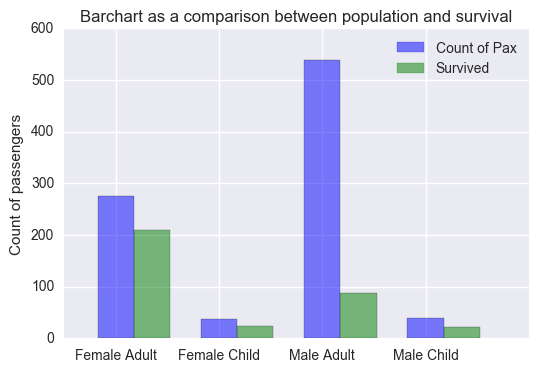

In [79]:
# SURVIVAL against Age which is given by Adult_Child parameter and the sex of the passenger
#The dataframe is grouped on Sex and then subgrouped on the age and the survival count agasint  the total passengers 
#in that grouping is given below
% matplotlib inline
import matplotlib.patches as mpatches

Survival_grouped_Age_Sex =Titanic_df.groupby(['Sex','Adult_Child'])['Survived']
Survival_grouped_Age_Sex_Sum =Survival_grouped_Age_Sex.sum()
Survival_grouped_Age_Sex_Count =Survival_grouped_Age_Sex.count()

#Printing the statistics in numbers
print (("\t\t")+("#Survived")+("  ")+("#Onboard"))
print (Survival_grouped_Age_Sex.agg([np.sum,len]))

#Axis setting  a bar-chart to show the comparison
X_axis = ('Female Adult','Female Child','Male Adult','Male Child')
x_pos = np.arange(len(X_axis))
#Values for the y -axis in an array
Total_Count = Survival_grouped_Age_Sex_Count.values
Survived_Count = Survival_grouped_Age_Sex_Sum.values
#Setting the chart parametres
bar_width = 0.35
plt.bar(x_pos, Total_Count, bar_width, align='center',alpha=0.5,color='b')
plt.bar(x_pos+bar_width, Survived_Count, bar_width, align='center', alpha=0.5,color='g')
plt.xticks(x_pos, X_axis)
plt.ylabel('Count of passengers')
plt.title('Barchart as a comparison between population and survival')
#For the Legend
blue_patch = mpatches.Patch(color='b',alpha=0.5, label = 'Count of Pax')
green_patch = mpatches.Patch(color='g',alpha=0.5,label = 'Survived')
plt.legend(handles=[blue_patch,green_patch])



### OBSERVATION 1
From the above statistics and chart ,it can be observed that the children and Female Adult had better chances of survival than Male-Adult


	#Survived  #Onboard
             sum  len
Family               
Travel Solo  163  537
With Family  179  354
Probability of survival based on 
Family
Travel Solo    0.303538
With Family    0.505650
Name: Survived, dtype: float64


([<matplotlib.patches.Wedge at 0x1bef0e0ca20>,
  <matplotlib.text.Text at 0x1bef0e520b8>])

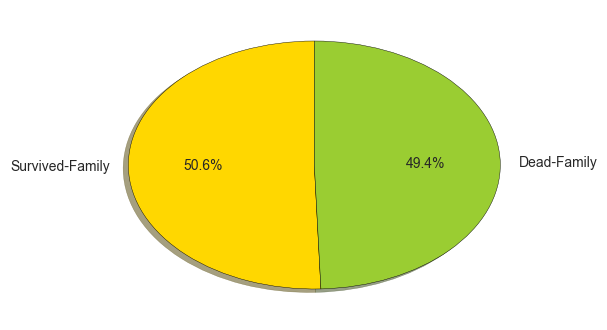

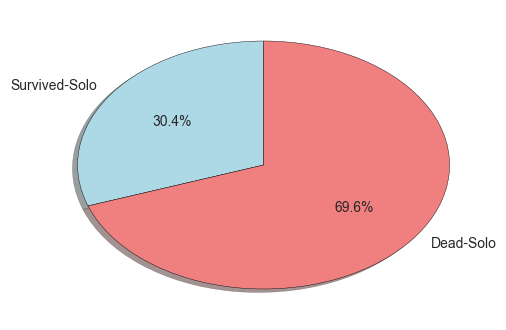

In [80]:
# Did Travelling along with family affect the survival of the passenger
#No data cleaning is performed on the SibSp and PArch columns since there are no null values 

# The below function calculates the probability of survival based on the values
def Prob_survival(data):
    return (data.sum()/data.count())

#Creating a new column to  classify people travelling Solo and With family
Titanic_df['Family']= Titanic_df['SibSp']+Titanic_df['Parch']
Titanic_df['Family']= np.where(Titanic_df['Family'] !=0,'With Family','Travel Solo')
Survived_grouped_family = Titanic_df.groupby(['Family'])['Survived']
Prob_Survival_Family = Survived_grouped_family.apply(Prob_survival)
print (("\t")+("#Survived")+("  ")+("#Onboard"))
print(Survived_grouped_family.agg([np.sum,len]))
print ("Probability of survival based on ")
print (Prob_Survival_Family)

#Depicting the Survial data as a % factor (probability) in a pie chart
plt.figure(0)
labels1 = 'Survived-Family','Dead-Family'
Sizes1 = Prob_Survival_Family[1] ,1-Prob_Survival_Family[1]
colors1 = ['gold', 'yellowgreen']
plt.pie(Sizes1,labels=labels1, colors=colors1,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.figure(1)
labels2 = 'Survived-Solo','Dead-Solo'
Sizes2 = Prob_Survival_Family[0] ,1-Prob_Survival_Family[0]
colors2 = ['lightblue', 'lightcoral']
plt.pie(Sizes2,labels=labels2, colors=colors2,
        autopct='%1.1f%%', shadow=True, startangle=90)

### OBSERVATION 2
The probability of survival is close to 0.5 when you are together with family as against travelling solo which is much lesser to only 0.3

#### Analysing the Socio economic status


There are 687 (from the below statements result)rows for which the Value is not available.

An attempt was made to decipher the cabin class based on the ticket number but since the Nan values are much higher 

this column has been omitted from any further analysis.


In [81]:

Null_values_cabin = Titanic_df['Cabin'].isnull().sum()
print(Null_values_cabin)
 

687


In [82]:
# checking the correlation between the Passenger class and the ticket fare paid
Titanic_df.groupby(['Pclass'])['Fare'].describe()

Pclass       
1       count    216.000000
        mean      84.154687
        std       78.380373
        min        0.000000
        25%       30.923950
        50%       60.287500
        75%       93.500000
        max      512.329200
2       count    184.000000
        mean      20.662183
        std       13.417399
        min        0.000000
        25%       13.000000
        50%       14.250000
        75%       26.000000
        max       73.500000
3       count    491.000000
        mean      13.675550
        std       11.778142
        min        0.000000
        25%        7.750000
        50%        8.050000
        75%       15.500000
        max       69.550000
Name: Fare, dtype: float64

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


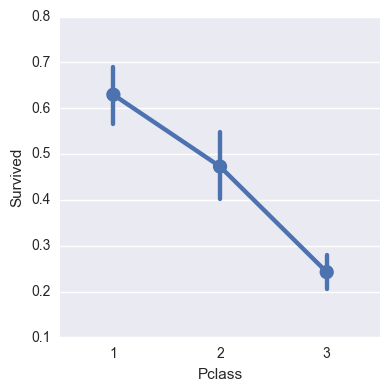

In [71]:
print (Titanic_df.groupby(['Pclass'])['Survived'].sum())
print (Titanic_df.groupby(['Pclass'])['Survived'].count())
sns.factorplot("Pclass","Survived",order=[1,2,3],data = Titanic_df,kind = 'point')

### OBSERVATION 3
The survival probability of Pclass =1 is much more than the other 2 classes as per the above graphical representation

In [83]:
#The Fare paid by each of the passengers are categoriesed to check the Survival rates
def Grading(element):
    if element >=0 and element<=15:
        return '0-15'
    elif element >=16 and element<=30:
        return '16-30'
    elif element >=31 and element<=45:
        return '31-45'
    elif element >=46 and element<=60:
        return '46-60'
    else:
        return 'Above 60'
        
def Binning_Fare(dfSeries):
    return dfSeries.apply(Grading)

#The Continuous variable Fare is converted into Categorical variable and a new colum called Bucketed Fare is created
Titanic_df['Bucketed_Fare']=Binning_Fare(Titanic_df['Fare']) 

Titanic_grouped_fare =Titanic_df.groupby(['Bucketed_Fare'])['Survived']
Prob_Survival_Fare_group =Titanic_grouped_fare.apply(Prob_survival)
print (Prob_Survival_Fare_group)

Bucketed_Fare
0-15        0.248908
16-30       0.456647
31-45       0.370370
46-60       0.591837
Above 60    0.636943
Name: Survived, dtype: float64


### OBSERVATION 4
The survival rates are clearly more than 50% for passengers who have paid a fare >45 for their ticket

In [84]:
# Grouping the data based on the Fare and PClass parameters
Titanic_grouped_fareclass =Titanic_df.groupby(['Pclass','Bucketed_Fare'])['Survived']
Prob_Survival_Fareclass_group =Titanic_grouped_fareclass.apply(Prob_survival)
print (Prob_Survival_Fareclass_group >0.5)

Pclass  Bucketed_Fare
1       0-15             False
        16-30             True
        31-45            False
        46-60             True
        Above 60          True
2       0-15             False
        16-30             True
        31-45             True
        Above 60         False
3       0-15             False
        16-30            False
        31-45            False
        46-60            False
        Above 60         False
Name: Survived, dtype: bool


### OBSERVATION 5
Clubbing the Pclass and the BinnnedFares ,we can observe that the probability of survival 
is above 50% for Pclass 1 and 2 and also when the fares are relatively on a higher side .
A fare of (0-15)has not survived in any of the Classes 

In [85]:
# Checking if the port of Embarkation affect the Survival-No null values to be addressed.

Titanic_df.groupby(['Embarked'])['Survived'].sum()/Titanic_df.groupby(['Embarked'])['Survived'].count()


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

	#Survived  #Onboard
          sum  len
Embarked          
C          93  168
Q          30   77
S         217  644


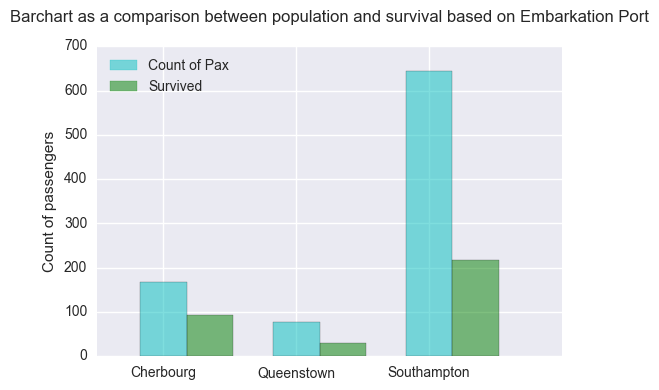

In [86]:
Survival_grouped_Embarked =Titanic_df.groupby(['Embarked'])['Survived']
Survival_grouped_Embarked_Sum =Survival_grouped_Embarked.sum()
Survival_grouped_Embarked_Count =Survival_grouped_Embarked.count()

#Printing the statisctics in numbers
print (("\t")+("#Survived")+("  ")+("#Onboard"))
print (Survival_grouped_Embarked.agg([np.sum,len]))

#Axis setting  a bar-chart to show the comparison
X_axis = ('Cherbourg','Queenstown','Southampton')
x_pos = np.arange(len(X_axis))
#Values for the y -axis in an array
Total_Count = Survival_grouped_Embarked_Count.values
Survived_Count = Survival_grouped_Embarked_Sum.values
#Setting the chart parametres
bar_width = 0.35
plt.bar(x_pos, Total_Count, bar_width, align='center',alpha=0.5,color='c')
plt.bar(x_pos+bar_width, Survived_Count, bar_width, align='center', alpha=0.5,color='g')
plt.xticks(x_pos, X_axis)
plt.ylabel('Count of passengers')
plt.title('Barchart as a comparison between population and survival based on Embarkation Port'+'\n')
#For the Legend
cyan_patch = mpatches.Patch(color='c',alpha=0.5, label = 'Count of Pax')
green_patch = mpatches.Patch(color='g',alpha=0.5,label = 'Survived')
plt.legend(handles=[cyan_patch,green_patch],loc=0)


### OBSERVATION 6
From the above chart it is evident that the people who embarked on Cherbourg had a better Survival rate than those from other ports

In [91]:
#Group by the name Title to check if there is any correlation
Titanic_group_Title =Titanic_df.groupby(['Title'])['Survived']
Prob_grouped_Title =Titanic_group_Title.apply(Prob_survival)
print (("\t")+("#Survived")+("  ")+("#Onboard"))
print (Titanic_group_Title.agg([np.sum,len]))
print (("\t\t")+("Probability"))
print (Prob_grouped_Title)


	#Survived  #Onboard
               sum  len
Title                  
 Capt            0    1
 Col             1    2
 Don             0    1
 Dr              3    7
 Jonkheer        0    1
 Lady            1    1
 Major           1    2
 Master         23   40
 Miss          127  182
 Mlle            2    2
 Mme             1    1
 Mr             81  517
 Mrs            99  125
 Ms              1    1
 Rev             0    6
 Sir             1    1
 the Countess    1    1
		Probability
Title
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.697802
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.792000
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64


#### OBSERVATION 7
From the above statistics it is observed that the ones with Title 'Mr' are less likely to survive as against salutations like Miss/Mrs/Master. 

The count of other Titles are very less to come up with  significant association towards the Survival pattern

In [76]:
#Combining all the above factors we can check if we can arrive at a drilled down correlation.
#Dropping the Fare categorisation for the below

Titanic_grouped_various =Titanic_df.groupby(['Sex','Adult_Child','Family','Pclass','Embarked'])['Survived']
Prob_Survival_various_group =Titanic_grouped_various.apply(Prob_survival)
# Checking for the ones with at least a minimum of 50% Survival
print (Prob_Survival_various_group >0.50)


Sex     Adult_Child  Family       Pclass  Embarked
female  A            Travel Solo  1       C            True
                                          S            True
                                  2       C            True
                                          Q            True
                                          S            True
                                  3       C            True
                                          Q            True
                                          S           False
                     With Family  1       C            True
                                          Q            True
                                          S            True
                                  2       C            True
                                          S            True
                                  3       C           False
                                          Q            True
                                          S      

### Conclusions:
 The above analysis shows a relation between the dependent variable 
Survived and the independent variables Age(Adult_child),Sex,Pclass,Embarkation port,Family presence

It is indicative  from the above data that women adult of class 1 and 2 had a better chance of survival and 
Children  irrespective of other factors had a better chance of survival.
The Pclass and Port of embarkation  did also to an extent offer some association
However further statistical tests are required to find out the significance of the corelation

#### REFERENCES
1.https://www.encyclopedia-titanica.org/children-on-titanic/
        
2.http://matplotlib.org/api/pyplot_api.html
    
3.https://www.kaggle.com/c/titanic

    